# EXAMEN

Instrucciones Generales para el Examen:
* Utiliza en todos los pasos aleatorios random_state=5, para que pueda reproducir exactamente los datos a la hora de corregir los ejercicios. 
* Documenta todos los pasos de tu análisis y las decisiones que tomas.
* Se evaluará la precisión del modelo, la comprensión de los conceptos de Machine Learning, la calidad del código y la calidad de las explicaciones.

## EJERCICIO 1

Carga el conjunto de datos Iris desde scikit-learn.

Explora los datos visualmente utilizando gráficos: representa la distribución de cada variable (todas las de X e y), diagramas de cajas de cada variable (todas las de X) y la matriz de correlaciones para entender las relaciones entre las características. ¿Qué puedes deducir?

Divide el conjunto de datos en entrenamiento y prueba, estratificando por el tipo de flor.

Prepara los datos mediante una pipeline.

Entrena y evalúa un clasificador de Random Forest (añade Random Forest al pipeline) y utiliza validación cruzada. ¿Qué medición has usado para evaluar el modelo y por qué? ¿Cuál es el mejor y el peor error que consigues?

Optimiza el número de árboles, ¿cuál es el mejor valor?

Evalúa el rendimiento del modelo optimizado en el conjunto de prueba.

Guarda el modelo en un fichero y cárgalo desde un fichero .py que pida 4 datos para una nueva flor (anchura del pétalo, longitud del pétalo, anchura del sépalo y longitud del sépalo) y prediga de que clase es la flor.

In [3]:
from sklearn import datasets


iris = datasets.load_iris(as_frame=True)
X, y = iris.data, iris.target
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
y.describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

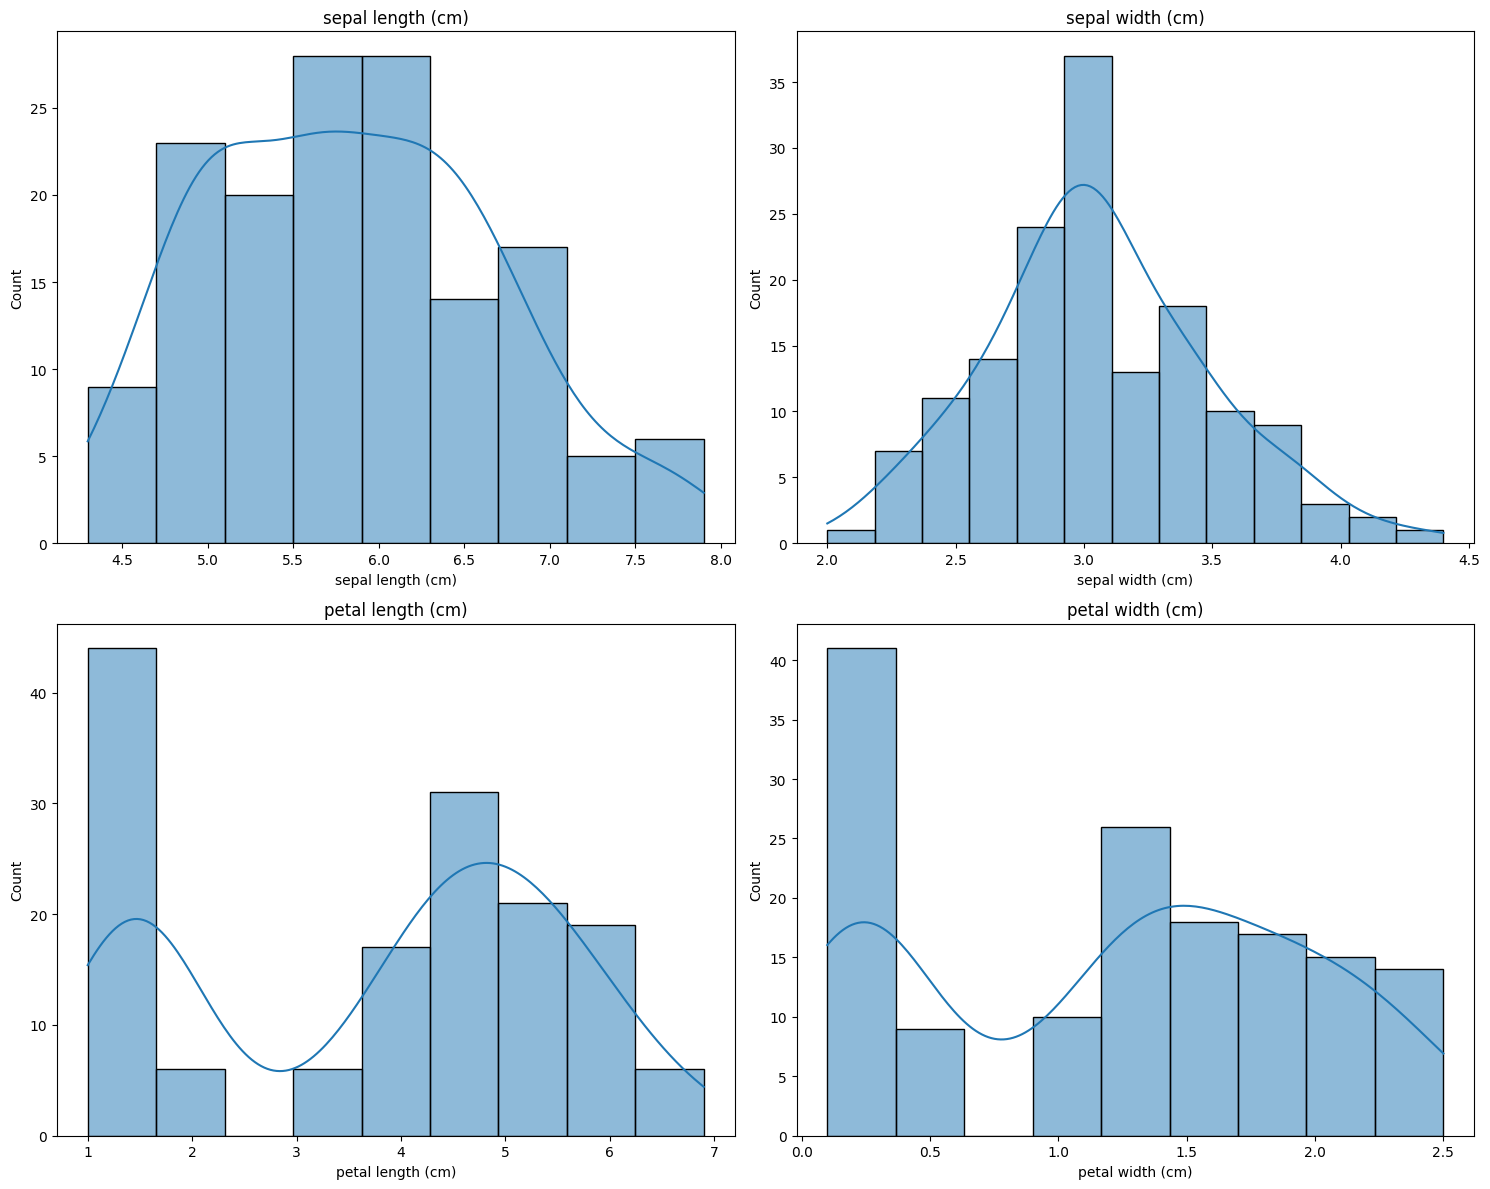

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = iris.feature_names
plt.figure(figsize=(15, 12))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1)  # 4 filas, 3 columnas
    sns.histplot(X[feature], kde=True)
    plt.title(feature)
    plt.tight_layout()

plt.show()

In [9]:
import pandas as pd
iris_df = pd.concat([X, y.rename('target')], axis=1)
corr_matrix = iris_df.corr()
corr_matrix.style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


las variables mas correlacionadas son petal lenght y petal widht, sepal length y sepal width tambien estan correlacionadas pero no tanto

In [10]:
from sklearn.model_selection import train_test_split

iris_train, iris_test = train_test_split(iris_df, test_size=0.15, stratify=iris_df["target"], random_state=5)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler

imputer_media = SimpleImputer(strategy="median")

def column_pipeline():
    return make_pipeline(
        imputer_media,
        StandardScaler())

preprocessing = ColumnTransformer([
        ("sepal length (cm)", column_pipeline(), ["sepal length (cm)"]),
        ("sepal width (cm)", column_pipeline(), ["sepal width (cm)"]),
        ("petal length (cm)", column_pipeline(), ["petal length (cm)"]),
        ("petal width (cm)", column_pipeline(), ["petal width (cm)"])
    ]) 

In [12]:
iris_train2 = iris_train.copy()
df_iris_prepared = preprocessing.fit_transform(iris_train2)
df_iris_prepared = pd.DataFrame(
    df_iris_prepared, columns=preprocessing.get_feature_names_out(),
    index=iris_train2.index)
df_iris_prepared


,sepal length (cm)__sepal length (cm),sepal width (cm)__sepal width (cm),petal length (cm)__petal length (cm),petal width (cm)__petal width (cm)
54,0.851798,-0.607931,0.497639,0.402179
28,-0.783456,0.750554,-1.342585,-1.309153
0,-0.909245,0.976968,-1.342585,-1.309153
114,-0.028723,-0.607931,0.785174,1.586947
121,-0.280301,-0.607931,0.670160,1.060383
...,...,...,...,...
67,-0.028723,-0.834345,0.210104,-0.256026
40,-1.035034,0.976968,-1.400092,-1.177513
23,-0.909245,0.524140,-1.170064,-0.914231
59,-0.783456,-0.834345,0.095090,0.270538


In [13]:
X_train = iris_train.drop("target", axis=1)
y_train = iris_train["target"].copy()

X_test = iris_test.drop("target", axis=1)
y_test = iris_test["target"].copy()

In [14]:
from sklearn.ensemble import RandomForestClassifier

rdm_forest = make_pipeline(preprocessing, RandomForestClassifier(random_state=5))
rdm_forest.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('sepal length (cm)',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)']),
                                                 ('sepal width (cm)',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['sepal width (...
                                                 ('petal length (cm)',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['petal length (cm)']),
                                                 ('petal width (cm)',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['petal width (cm)'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=5))])

In [15]:
from sklearn.model_selection import cross_val_score


score = cross_val_score(rdm_forest, X_train, y_train, cv=3, scoring='accuracy')

In [16]:
# He usado accuracy ya que se trata de clasificacion y lo que nos interesa es adivinar el tipo de flor que es en concreto

print("Maximo: ", score.max())
print("Minimo: ", score.min())

Maximo:  1.0
Minimo:  0.9047619047619048


In [17]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV

warnings.simplefilter('ignore', category=ConvergenceWarning)
param_grid = {
    'randomforestclassifier__n_estimators': [1, 5, 10, 50, 100],
}

grid_search = GridSearchCV(rdm_forest, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Mejores parámetros: ', grid_search.best_params_)
best_model = grid_search.best_estimator_

Mejores parámetros:  {'randomforestclassifier__n_estimators': 1}


In [18]:
best_model.fit(X_test, y_test)
score2 = cross_val_score(best_model, X_train, y_train, cv=3, scoring='accuracy')
print("Maximo: ", score2.max())
print("Minimo: ", score2.min())

Maximo:  1.0
Minimo:  0.9069767441860465


In [19]:
import joblib
joblib.dump(best_model, "modelo_iris.pkl")

['modelo_iris.pkl']

## EJERCICIO 2

En este ejercicio, trabajarás con un conjunto de datos de pruebas creados (ejercicio2.csv). 

Tu objetivo es construir un modelo de regresión que pueda predecir con precisión la variable dependiente y a partir de las variables independientes x1 y x2. 

Deberás:
* Cargar los datos
* Visualizar gráficamente los datos (x1 respecto a y e x2 respecto a y)
* Dividir los datos en conjunto de entrenamiento y pruebas
* Probar diferentes modelos de regresión polinómica, hasta ver cuál es el mejor degree (y explicarlo gráficamente y por medida del error en los conjuntos de entrenamiento y pruebas), no hace falta que uses validación cruzada. ¿Qué medición has usado para evaluar el modelo y por qué? ¿cuál es el mejor degree?
* Probar ahora con Elastic Net, optimizando los hiperparámetros con búsqueda exhaustiva, ¿ha mejorado con esta regularización? ¿cuáles son los mejores datos para los hiperparámetros?

In [20]:
df = pd.read_csv("ejercicio2.csv")
df

,x1,x2,y
0,0.488135,3.115185,-91.197936
1,2.151894,-0.239160,-44.928270
2,1.027634,0.231560,-5.347793
3,0.448832,-2.494794,78.026649
4,-0.763452,1.050430,2.176875
...,...,...,...
1995,2.912816,-1.503606,-54.720299
1996,2.211981,-0.651264,-39.841896
1997,-0.198922,3.300029,-104.087315
1998,1.438640,4.328062,-303.627063


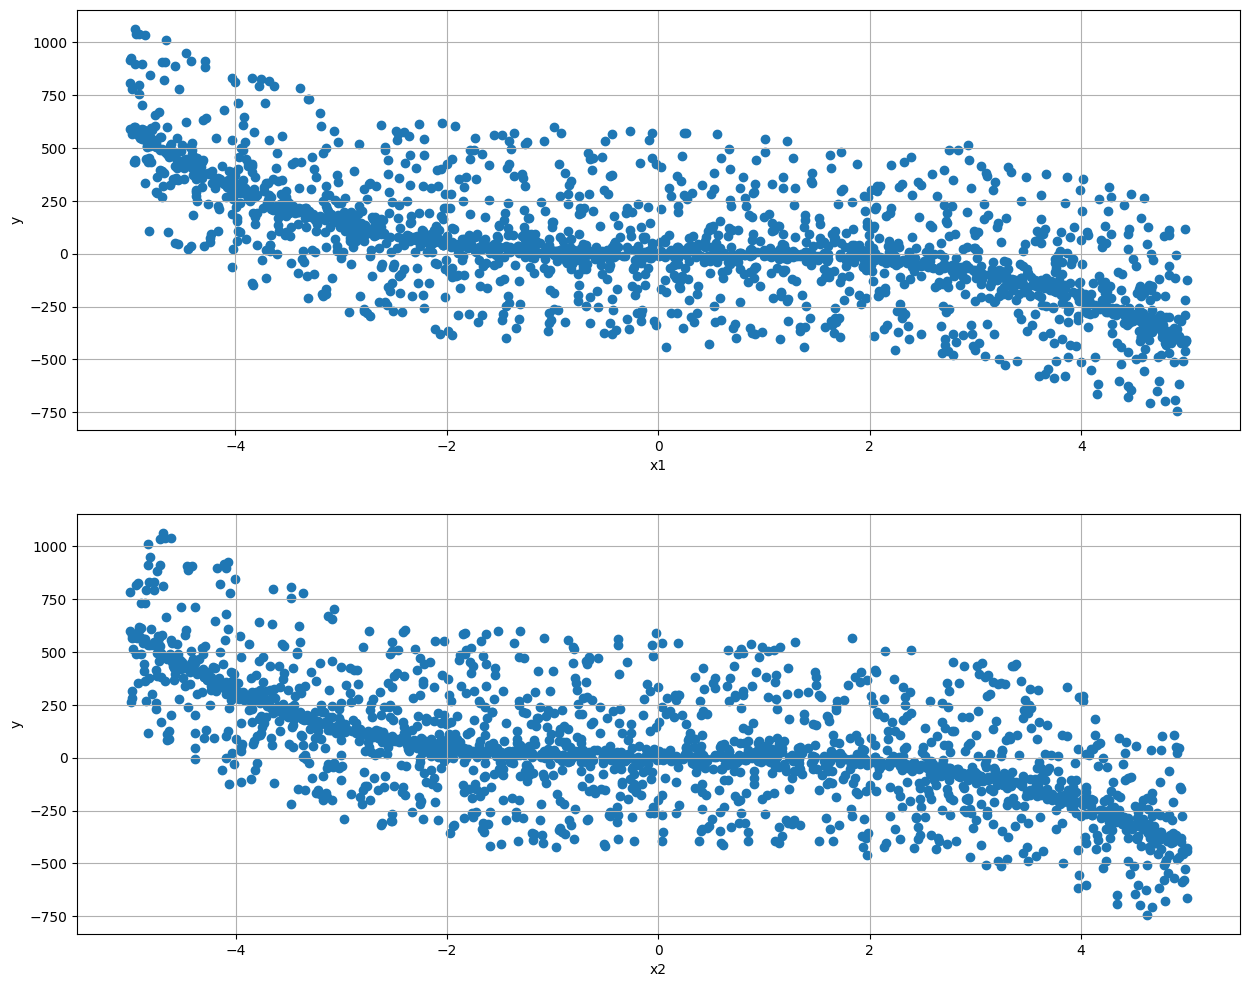

In [21]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)

plt.scatter(df["x1"], df["y"])
plt.xlabel("x1")
plt.ylabel("y")
plt.grid()

plt.subplot(2, 1, 2)

plt.scatter(df["x2"], df["y"])
plt.xlabel("x2")
plt.ylabel("y")
plt.grid()

plt.subplot(2, 1, 2)


plt.show()

In [22]:
train_set, test_set = train_test_split(df, test_size=0.15, random_state=5)

In [23]:
X_train = train_set.drop("y", axis=1)
y_train = train_set["y"].copy()

X_test = test_set.drop("y", axis=1)
y_test = test_set["y"].copy()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression_1 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=1, include_bias=False),
    LinearRegression())

polynomial_regression_2 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression())

polynomial_regression_3 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression())

polynomial_regression_4 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=4, include_bias=False),
    LinearRegression())

polynomial_regression_5 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=5, include_bias=False),
    LinearRegression())



In [25]:
from sklearn.metrics import mean_squared_error

degrees = [1,2,3,4,5]
train_error = []
test_error = []

polynomial_regression_1.fit(X_train, y_train)
train_error.append(mean_squared_error(y_train, polynomial_regression_1.predict(X_train)))
test_error.append(mean_squared_error(y_test, polynomial_regression_1.predict(X_test)))

polynomial_regression_2.fit(X_train, y_train)
train_error.append(mean_squared_error(y_train, polynomial_regression_2.predict(X_train)))
test_error.append(mean_squared_error(y_test, polynomial_regression_2.predict(X_test)))

polynomial_regression_3.fit(X_train, y_train)
train_error.append(mean_squared_error(y_train, polynomial_regression_3.predict(X_train)))
test_error.append(mean_squared_error(y_test, polynomial_regression_3.predict(X_test)))

polynomial_regression_4.fit(X_train, y_train)
train_error.append(mean_squared_error(y_train, polynomial_regression_4.predict(X_train)))
test_error.append(mean_squared_error(y_test, polynomial_regression_4.predict(X_test)))

polynomial_regression_5.fit(X_train, y_train)
train_error.append(mean_squared_error(y_train, polynomial_regression_4.predict(X_train)))
test_error.append(mean_squared_error(y_test, polynomial_regression_4.predict(X_test)))

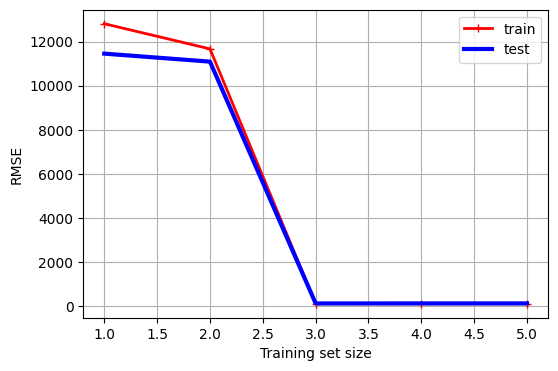

In [26]:
plt.figure(figsize=(6, 4))
plt.plot(degrees, train_error, "r-+", linewidth=2, label="train")
plt.plot(degrees, test_error, "b-", linewidth=3, label="test")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.show()


In [27]:
# Eh usado el error cuadratico medio porque es de los mas eficaces para regresion
# El mejor degree es 3
print("Score con degree 3: ", test_error[2])

Score con degree 3:  111.79073306023561


In [28]:
from sklearn.linear_model import ElasticNet

elastic_net = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=5)
)


In [29]:
warnings.simplefilter('ignore')
param_grid = {
    'elasticnet__alpha': [0.01, 0.1, 0.5, 1, 2, 5],
    'elasticnet__l1_ratio': [0.01, 0.1, 0.5, 1, 2, 5],
    'elasticnet__fit_intercept': [True, False],
}

grid_search = GridSearchCV(elastic_net, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_test, y_test)

print("score: ", grid_search.best_score_) # Ha mejorado un poco el score con elasticnet
print('Mejores parámetros: ', grid_search.best_params_)

score:  -106.8469012424411
Mejores parámetros:  {'elasticnet__alpha': 0.01, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.5}


## EJERCICIO 3

Carga el conjunto de datos winequality.csv, intentamos predecir la calidad del vino (quality) a partir del resto de características, explora los datos y divide el conjunto de datos en entrenamiento y pruebas (10% para las pruebas).

Crea un pipeline para preparar los datos y aplicar un algoritmo de máquinas de vector soporte, entrena el modelo (guarda el tiempo que tardas en entrenar el modelo) y evalúa el modelo en el conjunto de pruebas (no hace falta que pruebes con diferentes hiperparámetros...)

Crea un pipeline para preparar los datos y aplicar PCA que explique al menos el 95% de la varianza, aplica esta pipeline al conjunto de entrenamiento y al conjunto de pruebas.

Muestra cuantas dimensiones tenías al principio y cuantas después de aplicar PCA.

Aplica a los datos obtenido de aplicar PCA el algoritmo de máquinas de vector soporte, entrena el modelo (guarda el tiempo que tardas en entrenar el modelo) y evalúa el modelo en el conjunto de pruebas (no hace falta que pruebes con diferentes hiperparámetros...)

Compara el error y el tiempo empleado en los dos modelos (sin pca y con pca) e interpreta el resultado.


In [31]:
winequality_df = pd.read_csv("winequality.csv", sep=";")
winequality_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [384]:
winequality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [385]:
winequality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [386]:
winequality_df_corr = winequality_df.corr()
winequality_df_corr.style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [387]:
train_set, test_set = train_test_split(winequality_df, test_size=0.1, random_state=5)

In [388]:
X_train = train_set.drop("quality", axis=1)
y_train = train_set["quality"].copy()

X_test = test_set.drop("quality", axis=1)
y_test = test_set["quality"].copy()

In [389]:
from sklearn.calibration import LinearSVC

wine_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    LinearSVC(random_state=5)
)

In [390]:
import time


inicio = time.time()
wine_pipeline.fit(X_train, y_train)
fin = time.time()

tiempo1 = fin - inicio
tiempo1

0.14488959312438965

In [398]:
from sklearn.metrics import accuracy_score

error = cross_val_score(wine_pipeline, X_test, y_test, cv=3, scoring='neg_root_mean_squared_error').mean()
error

-0.7239560290360013

In [392]:
from sklearn.decomposition import PCA


wine_pipeline_pca = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    PCA(n_components=0.95, random_state=5)
)

X_train_reduced = wine_pipeline_pca.fit_transform(X_train)
X_test_reduced = wine_pipeline_pca.fit_transform(X_test)

print("antes:", X_train.shape)
print("despues:", X_train_reduced.shape)


antes: (1439, 11)
despues: (1439, 9)


In [393]:
inicio = time.time()
wine_pipeline.fit(X_train_reduced, y_train)
fin = time.time()

tiempo2 = fin - inicio
tiempo2

0.12754392623901367

In [397]:
error_pca = cross_val_score(wine_pipeline, X_test_reduced, y_test, cv=3, scoring='neg_root_mean_squared_error').mean()
error_pca

-0.7069177950805412

In [400]:
print("Tiempos: Sin pca: {}, con pca: {}".format(tiempo1, tiempo2))
print("Error: Sin pca: {}, con pca: {}".format(error, error_pca))

# Al usar PCA se reduce el tiempo de entrenamiento y el error

Tiempos: Sin pca: 0.14488959312438965, con pca: 0.12754392623901367
Error: Sin pca: -0.7239560290360013, con pca: -0.7069177950805412


## EJERCICIO 4

Una empresa de coches ha sacado un nuevo modelo al mercado. Le ha preguntado a una red social quién ha comprado el producto, recaudando el sexo, la edad y el salario de cada uno de ellos. Ahora queremos construir un modelo que nos permita determinar con estos atributos si la persona comprará el producto o no, para tomar medidas en función de la respuesta para que lo acabe comprando.

Los datos están en el csv

### RECOPILACIÓN Y RECOLECCIÓN DE LOS DATOS

####  OBTENER LOS DATOS

In [199]:
compras_df = pd.read_csv("compras.csv")
compras_df

,Identificador,Sexo,Edad,Salario,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0
...,...,...,...,...,...
395,15691863,Mujer,46,41000,1
396,15706071,Hombre,51,23000,1
397,15654296,Mujer,50,20000,1
398,15755018,Hombre,36,33000,0


#### EXPLORAR LOS DATOS 
Con exhaustividad: datos estadísticos, gráficos, correlaciones... e indicar las deduciones a las que llegas

In [200]:
compras_df.head()

,Identificador,Sexo,Edad,Salario,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0


In [201]:
compras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Identificador  400 non-null    int64 
 1   Sexo           400 non-null    object
 2   Edad           400 non-null    int64 
 3   Salario        400 non-null    int64 
 4   Compra         400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [212]:
# Elimino el identificador porque no tiene relacion las compras
compras_df2 = compras_df.drop(["Identificador"],axis=1)

In [213]:
compras_df2.describe()

,Edad,Salario,Compra
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [215]:
compras_df2.describe(include='object')

,Sexo
count,400
unique,2
top,Mujer
freq,204


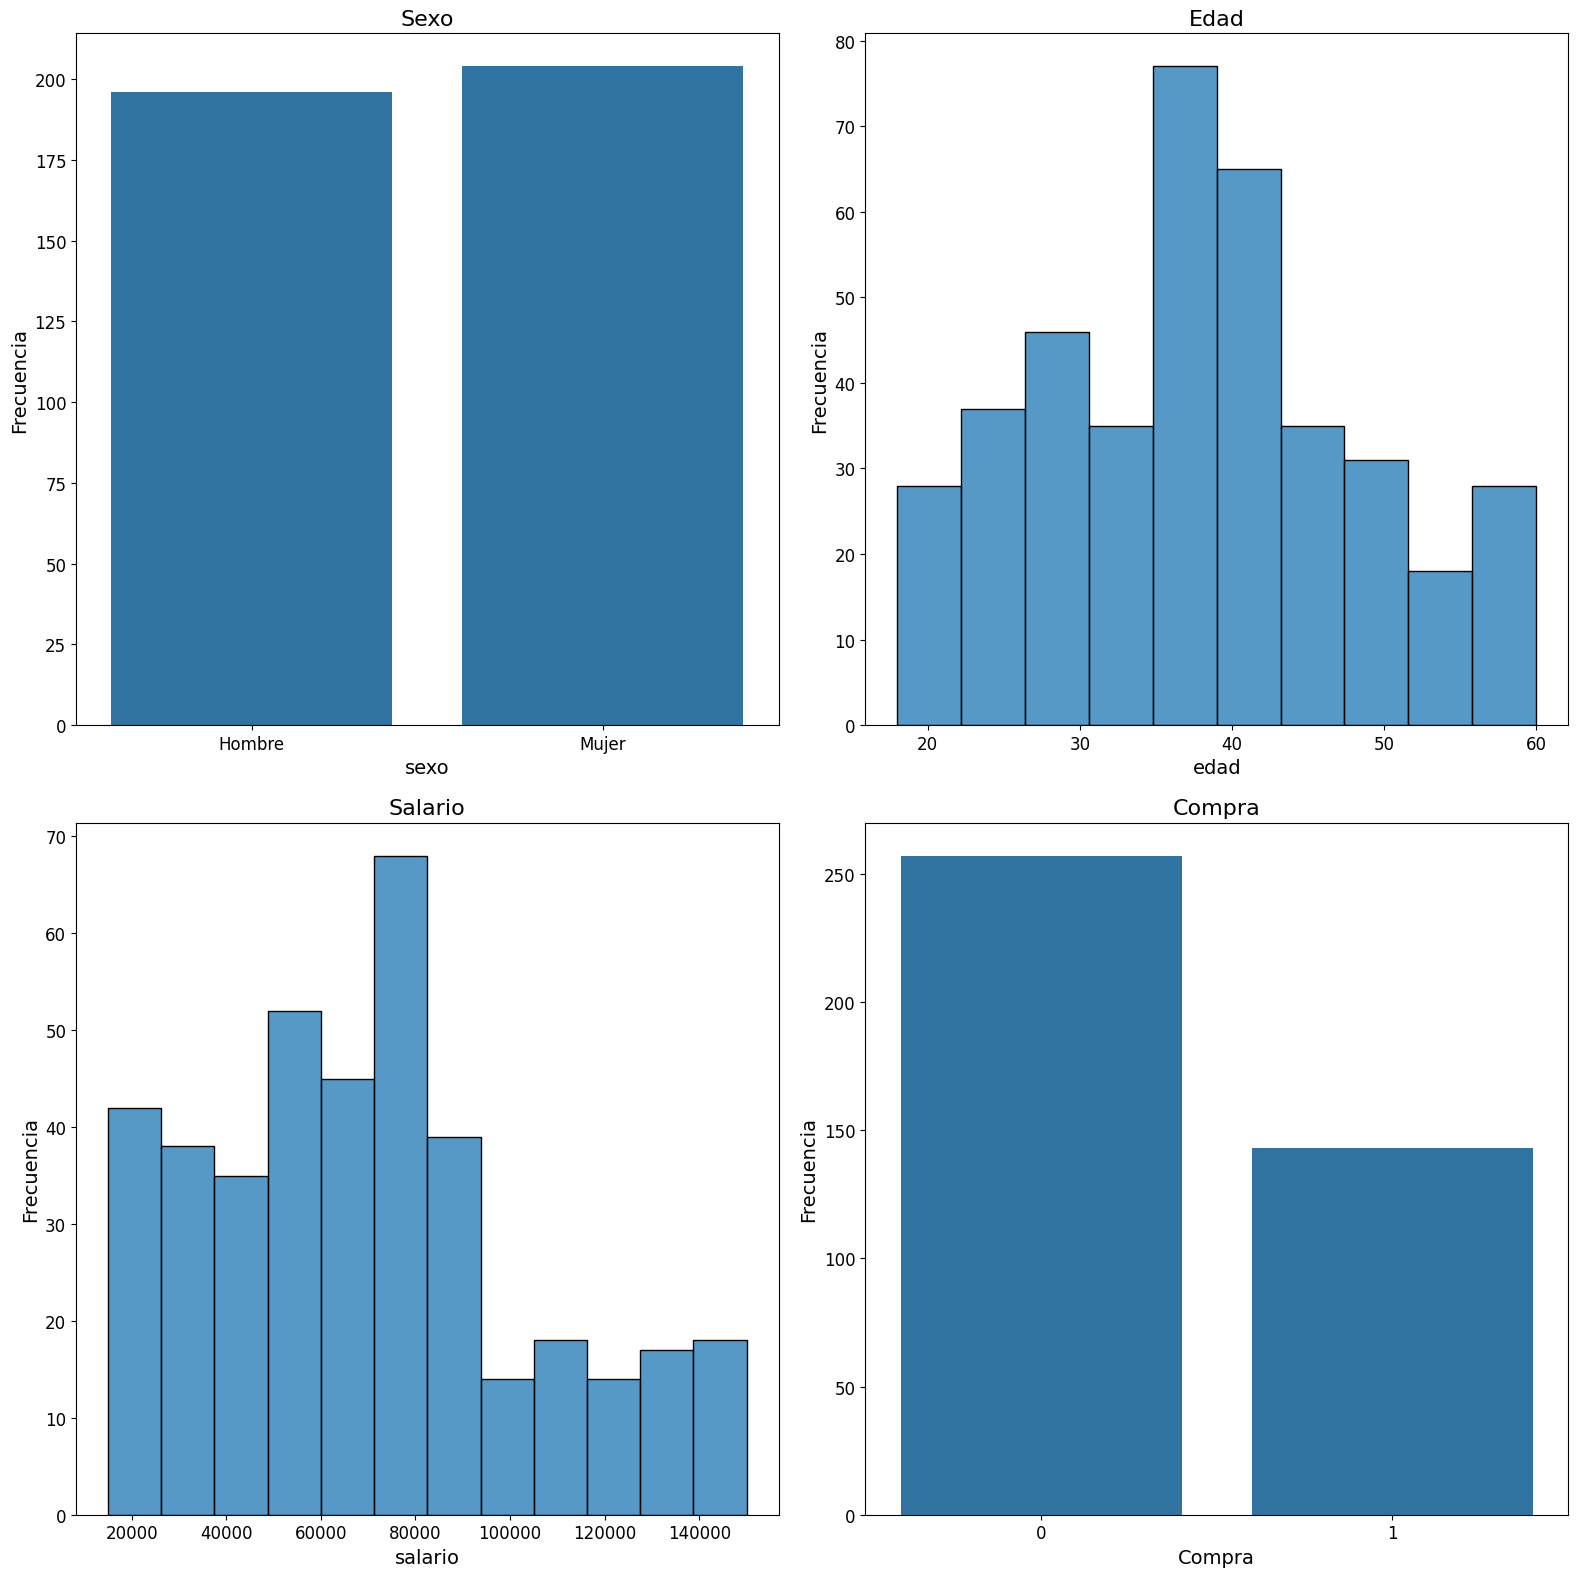

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=16)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
sns.countplot(data=compras_df2, x='Sexo')
plt.title("Sexo")
plt.xlabel("sexo")
plt.ylabel("Frecuencia")

plt.subplot(2, 2, 2)
sns.histplot(data=compras_df2, x='Edad')
plt.title("Edad")
plt.xlabel("edad")
plt.ylabel("Frecuencia")

plt.subplot(2, 2, 3)
sns.histplot(data=compras_df2, x='Salario')
plt.title("Salario")
plt.xlabel("salario")
plt.ylabel("Frecuencia")

plt.subplot(2, 2, 4)
sns.countplot(data=compras_df2, x='Compra')
plt.title("Compra")
plt.xlabel("Compra")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [ ]:
# la mayoria son mujeres
# la mayoria no compro el coche
# la mayoria tiene un salario menor a 100000
# la mayoria tiene entre 30 y 50 años

In [223]:
compras_df2[["Sexo", "Compra"]].groupby(['Sexo'], as_index=False).mean().sort_values(by='Compra', ascending=False)
# El sexo no influye en la compra

,Sexo,Compra
1,Mujer,0.377451
0,Hombre,0.336735


In [232]:
corr_matrix = compras_df2.corr(numeric_only=True)
corr_matrix["Compra"].sort_values(ascending=False)
corr_matrix["Compra"].sort_values(ascending=False)
corr_matrix.style.background_gradient()
# La edad tiene mas relacion con la compra

,Edad,Salario,Compra
Edad,1.000000,0.155238,0.622454
Salario,0.155238,1.000000,0.362083
Compra,0.622454,0.362083,1.000000


In [234]:
compras_df2[["Salario", "Compra"]].groupby(['Compra'], as_index=False).mean().sort_values(by='Salario', ascending=False)
# El salario medio de la gente que compro fue de 86272

,Compra,Salario
1,1,86272.727273
0,0,60544.747082


In [236]:
compras_df2[["Edad", "Compra"]].groupby(['Compra'], as_index=False).mean().sort_values(by='Edad', ascending=False)
# La edad media de la gente que compro fue de 46

,Compra,Edad
1,1,46.391608
0,0,32.793774


#### DIVIDIR LOS DATOS EN CONJUNTO DE ENTRENAMIENTO Y PRUEBAS

In [237]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(compras_df2, test_size=0.15, random_state=42)

#### PREPARAR LOS DATOS
Algunas pistas a tener en cuenta (** esto no quiere decir que sólo haya que hacer esto**):
* No usar las características que no sirven
* Tratar los valores nulos (aunque ahora no haya)
* Edad: primeramente convertir en categórica poniendo las siguientes etiquetas y luego aplicar el cambio que procede en las variables categóricas (es para aplicar los diferentes tipos de transformaciones que hay, no porque tenga mucho sentido).
  * 0-20 --> Rango1
  * 20-30 --> Rango 2
  * 30-40 --> Rango 3
  * 40-50 --> Rango 4
  * 50- --> Rango 5

* Salario: aplicar logaritmo (aunque no tenga una cola larga a la derecha) y luego estandarizar

In [239]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

imputer_moda = SimpleImputer(strategy="most_frequent")
imputer_media = SimpleImputer(strategy="median")

def func_transform_sex(data):
    return np.where(data == "Mujer", 1, 0)

def name_transform_sex(function_transformer, feature_names_in):
    return ["Sexo"]

transformer_sexo = FunctionTransformer(
    func_transform_sex, 
    feature_names_out=name_transform_sex
)

def func_transform_edad(data):
    data = pd.DataFrame(data, columns = ["Edad"])
    data["Edad"] = pd.cut(data["Edad"], bins = [0, 20, 30, 40, 50, np.inf], labels = [1, 2, 3, 4, 5])
    return data

def name_transform_edad(function_transformer, feature_names_in):
    return ["Edad"]

transformer_edad = FunctionTransformer(
    func_transform_edad, 
    feature_names_out=name_transform_edad, 
    validate=False
)

def name_transform_salario(function_transformer, feature_names_in):
    return ["Salario"]

transformer_salario = FunctionTransformer(
    np.log, 
    inverse_func=np.exp,
    feature_names_out=name_transform_salario
)

# log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
# log_pop = log_transformer.transform(housing[["population"]])


salario_pipeline = make_pipeline(imputer_moda, transformer_salario, StandardScaler())
sexo_pipeline = make_pipeline(imputer_moda, transformer_sexo)
edad_pipeline = make_pipeline(imputer_media, transformer_edad)

pipeline_compras = ColumnTransformer([
    ('Edad', edad_pipeline, ['Edad']),
    ('Sexo', sexo_pipeline, ['Sexo']),
    ('Salario', salario_pipeline, ['Salario']),
    ],)

train_set_pipeline = train_set.copy()
aux = pipeline_compras.fit_transform(train_set_pipeline)
train_set_pipeline = pd.DataFrame(aux, columns=pipeline_compras.get_feature_names_out(),index=train_set_pipeline.index)
train_set_pipeline

,Edad__Edad,Sexo__Sexo,Salario__Salario
124,4.0,1.0,-0.335641
294,3.0,1.0,-0.136934
255,5.0,1.0,0.679072
78,2.0,1.0,0.618506
101,2.0,0.0,-0.075324
...,...,...,...
71,2.0,1.0,-1.471845
106,2.0,1.0,-1.008224
270,4.0,1.0,1.376777
348,3.0,0.0,0.400368
